# Sprint 機械学習スクラッチ 線形回帰

**Sprintの目的**

- スクラッチを通して線形回帰を理解する
- オブジェクト指向を意識した実装に慣れる
- 数式をコードに落とし込めるようにする

**どのように学ぶか** 

スクラッチで線形回帰を実装した後、学習と検証を行なっていきます。

**線形回帰のクラスをスクラッチで作成していく作業に入る前、問題1から問題5までそれぞれのパーツがどのように動くかを理解するために、クラスを使わずにやってみる**

## 【問題1】仮定関数

In [1]:
import numpy as np
import pandas as pd

In [2]:
def _linear_hypothesis(X, theta):
    """
    線形の仮定関数を計算する

    Parameters
    ----------    
    X : 次の形のndarray, shape (n_samples, n_features(+1))
      訓練データ
    theta：次の形のndarray, shape (1, n_features(+1))
      パラメーター（重み）

    Returns
    -------
      次の形のndarray, shape (n_samples, 1)
      線形の仮定関数による推定結果

    """
#     hx = X @ theta.T # or(np.matmul(X, theta.T)): 2次元までの配列に使用と推奨
    hx = np.dot(X, theta.T) # or(np.matmul(X, theta)): ３次元以上の配列に使用と推奨
    return  hx

In [3]:
# 仮のデータで動きをテストしてみる
X = np.array([[1, 2 ,5 ,8], [1, 7, 3, 4], [1, 5, 4, 6], [1, 2, 3, 4], [1, 2, 3, 4], [1, 2, 3, 4]])
X

array([[1, 2, 5, 8],
       [1, 7, 3, 4],
       [1, 5, 4, 6],
       [1, 2, 3, 4],
       [1, 2, 3, 4],
       [1, 2, 3, 4]])

In [4]:
# # バイアスがかかっている場合、Xの最前列に1を入れる
# X = np.hstack([np.ones([X.shape[0], 1]), X])
# X

In [5]:
# 0 ~ 1からランダムな数字でthetaを作成(内積求めるため、thetaの列数はXの行数に合わせる)
theta = np.random.rand(len(X[0]))
theta

array([0.4390177 , 0.12024048, 0.13054442, 0.815807  ])

In [6]:
hx01 = _linear_hypothesis(theta, X)
hx01

array([7.85867681, 4.93556237, 6.45723983, 4.33435995, 4.33435995,
       4.33435995])

## 【問題2】最急降下法
## 【問題3】推定
## 【問題5】目的関数

In [7]:
# 仮に作った実測値y
y = np.array([[7, 8, 8, 6, 5, 4]])
y.shape

(1, 6)

In [8]:
# 予測値と実測値との残差
error = hx01 - y 
error

array([[ 0.85867681, -3.06443763, -1.54276017, -1.66564005, -0.66564005,
         0.33435995]])

In [9]:
# Xとアダマール積するため転置する
error.T

array([[ 0.85867681],
       [-3.06443763],
       [-1.54276017],
       [-1.66564005],
       [-0.66564005],
       [ 0.33435995]])

In [10]:
# error.TとXのアダマール積
error.T * X

array([[  0.85867681,   1.71735361,   4.29338403,   6.86941444],
       [ -3.06443763, -21.45106341,  -9.19331289, -12.25775052],
       [ -1.54276017,  -7.71380085,  -6.17104068,  -9.25656102],
       [ -1.66564005,  -3.3312801 ,  -4.99692015,  -6.66256021],
       [ -0.66564005,  -1.3312801 ,  -1.99692015,  -2.66256021],
       [  0.33435995,   0.6687199 ,   1.00307985,   1.33743979]])

In [11]:
# error.TとXのアダマール積の平均を求める = 勾配
grad_list = np.mean(error.T * X, axis=0)
grad_list

array([-0.95757353, -5.24022516, -2.84362167, -3.77209629])

In [12]:
# シータ更新：thetaを勾配×学習率に更新
alpha = 0.01 #学習率を一旦設定
theta -= alpha * grad_list
theta

array([0.44859344, 0.17264274, 0.15898064, 0.85352797])

In [13]:
# 更新されたシータで再度予測

hx02 = _linear_hypothesis(theta, X)
hx02

array([8.41700583, 5.54814637, 7.06889747, 4.68493269, 4.68493269,
       4.68493269])

In [14]:
# 更新されたシータでの予測値と実測値yとの残差確認

error02 = hx02 - y 
error02

array([[ 1.41700583, -2.45185363, -0.93110253, -1.31506731, -0.31506731,
         0.68493269]])

**次は残差を最小化するための式（損失関数＝目的関数）を立てる作業に入る。**

In [15]:
#目的関数の式：j_theta = np.mean(error_test**2)/2
#一旦イテレーション3回で回してみる

num_iter = 3 # イテレーション数
alpha = 0.01 #学習率を一旦設定
j_theta = theta # 目的関数j_thetaの初期値を一旦1と設定
error_test = error02
hx_test = hx02

for i in range(num_iter):
    j_theta = j_theta - np.mean(error_test**2)/2 #目的関数j_thetaの更新    
    hx_test = _linear_hypothesis(j_theta, X) # 更新されたシータで予測
    error_test = hx_test - y # 更新されたシータでの予測値と実測値yとのエラー更新
    print("j_theta", j_theta)
    print("予測値", hx_test)
    print("残差", error_test)
    print("-------------------")

j_theta [-0.48342706 -0.75937776 -0.77303986 -0.07849253]
予測値 [-6.49532206 -8.43216103 -7.84343042 -4.63527224 -4.63527224 -4.63527224]
残差 [[-13.49532206 -16.43216103 -15.84343042 -10.63527224  -9.63527224
   -8.63527224]]
-------------------
j_theta [-82.45587161 -82.73182231 -82.74548441 -82.05093708]
予測値 [-1318.05443492 -1238.01882933 -1319.40254328  -824.35971778
  -824.35971778  -824.35971778]
残差 [[-1325.05443492 -1246.01882933 -1327.40254328  -830.35971778
   -829.35971778  -828.35971778]]
-------------------
j_theta [-594569.48211066 -594569.75806136 -594569.77172346 -594569.07717613]
予測値 [-9513110.47425967 -8918543.41241504 -9513111.82236804 -5945694.62210825
 -5945694.62210825 -5945694.62210825]
残差 [[-9513117.47425967 -8918551.41241504 -9513119.82236804 -5945700.62210825
  -5945699.62210825 -5945698.62210825]]
-------------------


## 【問題4】平均二乗誤差

In [16]:
def MSE(y_pred, y):
    """
    平均二乗誤差の計算

    Parameters
    ----------
    y_pred : 次の形のndarray, shape (n_samples,)
      推定した値
    y : 次の形のndarray, shape (n_samples,)
      正解値

    Returns
    ----------
    mse : numpy.float
      平均二乗誤差
    """
    mse = np.mean((y_pred - y)**2)
    return mse

**ここから線形回帰のクラスをスクラッチで作成し、学習と検証を行っていく。**

In [31]:
class ScratchLinearRegression():
    """
    線形回帰のスクラッチ実装
    
    Parameters
    ----------
    num_iter : int
      イテレーション数
    lr : float
      学習率
    no_bias : bool
      バイアス項を入れない場合はTrue
    verbose : bool
      学習過程を出力する場合はTrue
    
    Attributes
    ----------
    self.coef_ : 次の形のndarray, shape (n_features,)
      パラメータ
    self.loss : 次の形のndarray, shape (self.iter,)
      訓練データに対する損失の記録
    self.val_loss : 次の形のndarray, shape (self.iter,)
      検証データに対する損失の記録
    """
    def __init__(self, num_iter=1000, lr=0.01, no_bias=False, verbose=False):
        # ハイパーパラメータを属性として記録
        self.iter = num_iter
        self.lr = lr
        self.no_bias = no_bias
        self.verbose = verbose
        # 損失を記録する配列を用意
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)
        self.theta_ = None
    
        
    def _linear_hypothesis(self, X):
        """
        線形回帰の仮定関数

        Parameters
        ----------    
        X : 次の形のndarray, shape (n_samples, n_features
          訓練データ

        Returns
        -------
          次の形のndarray, shape (n_samples, 1)
          線形回帰の仮定関数による推定結果

        """                    
        hx = np.dot(X, self.theta_.T) 
        return hx
    
        
    def fit(self, X, y, X_val=None, y_val=None):
        """
        線形回帰を学習する。検証データが入力された場合はそれに対する損失と精度もイテレーションごとに計算する。
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証データの正解値
        """              
        # バイアスがかかっているかどうか処理を分ける
        if self.no_bias:
            self.theta_ = np.random.rand(len(X[0])) # 初回パラメータθは乱数で作成
        else:
            X = np.hstack([np.ones([X.shape[0], 1]), X]) # バイアスがかかっている場合Xの最前列に1を入れる
            self.theta_ = np.random.rand(len(X[0]))
        
        for i in range(self.iter):
            yp = self._linear_hypothesis(X) # 仮定関数で予測値ypを計算
            self.theta_ = self._gradient_descent(X, y, yp) # θの値を更新
            self.loss[i] = self._loss_function(yp, y) # 損失関数でself.lossを記録
            y_pred = self.predict(X_val) # 検証データに対する学習
            self.val_loss[i] = self._loss_function(y_pred, y_val) # 損失関数でself.val_lossを記録
        
        if self.verbose:
            #verboseをTrueにした際は学習過程を出力
            print("loss :\n{}".format(self.loss))
            print("val_loss :\n{}".format(self.val_loss))       
    
    
    def _gradient_descent(self, X, y, yp):
        """
        最急降下法でθの値を更新する

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データ
        error : 次の形のndarray, shape (1, n_samples)
                測値と実測値の残差
        """
        # θの値を更新する
        self.theta_ -= self.lr * np.dot((yp - y) ,X) / X.shape[0]
        return self.theta_
        
    def predict(self, X):
        """
        線形回帰を使い推定する。
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル
        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            線形回帰による推定結果
        """
        X = np.hstack([np.ones([X.shape[0], 1]), X]) # バイアスありの想定でXの最前列に1を入れる                
        predict = np.dot(X, self.theta_.T)
        
        return predict

    
    def _loss_function(self, yp, y):
        # 損失関数の式に沿って実装
        loss = np.sum((yp -y) **2) / (2 * len(y))
        return loss

## 【問題6】学習と推定

機械学習スクラッチ入門のSprintで用意したHouse Pricesコンペティションのデータに対してスクラッチ実装の学習と推定を行なってください。


scikit-learnによる実装と比べ、正しく動いているかを確認してください。

In [32]:
# House Pricesコンペティションののtrainデータを読み込む

df_train = pd.read_csv('train.csv')
df_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [33]:
#特徴量YearBuiltをXに、目的変数SalePriceをyに、ndarray形式に抽出

X = df_train[['YearBuilt']].values
y = df_train[['SalePrice']].values
y = y.reshape(-1)
print('X.shape:',X.shape)
print('y.shape:',y.shape)
display(X)
display(y)

X.shape: (1460, 1)
y.shape: (1460,)


array([[2003],
       [1976],
       [2001],
       ...,
       [1941],
       [1950],
       [1965]])

array([208500, 181500, 223500, ..., 266500, 142125, 147500])

In [34]:
# 訓練用データ、検証用データに分割
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

print('X_train.shape: {}'.format(X_train.shape))
print('X_test.shape: {}'.format(X_test.shape))
print('y_train.shape: {}'.format(y_train.shape))
print('y_test.shape: {}'.format(y_test.shape))

X_train.shape: (1095, 1)
X_test.shape: (365, 1)
y_train.shape: (1095,)
y_test.shape: (365,)


In [35]:
# 標準化
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaler = scaler.transform(X_train)
X_test_scaler = scaler.transform(X_test)

In [36]:
# スクラッチ実装の学習と推定を行ってみる

reg_scratch = ScratchLinearRegression()

reg_scratch.fit(X_train_scaler, y_train, X_test_scaler, y_test)
y_pred_scratch = reg_scratch.predict(X_test_scaler)

In [37]:
# MSE（平均二乗誤差）を計算する
mse = MSE(y_pred_scratch, y_test)
print('MSE{:.1f}'.format(mse))
print('RMSE{:.1f}'.format(np.sqrt(mse)))

MSE4830010608.1
RMSE69498.3


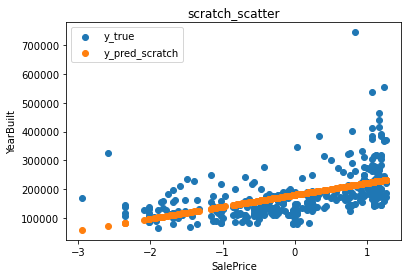

In [38]:
# 可視化:スクラッチ実装
import matplotlib.pyplot as plt
%matplotlib inline

plt.title('scratch_scatter')
plt.xlabel('SalePrice')
plt.ylabel('YearBuilt')
plt.scatter(X_test_scaler, y_test, label='y_true')
plt.scatter(X_test_scaler, y_pred_scratch, label='y_pred_scratch')
plt.legend()
plt.show()

**scikit-learnによる実装と比べ、正しく動いているかを確認**

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

reg_sklearn = LinearRegression() # LinearRegressionクラスのインスタンス化
reg_sklearn.fit(X_train_scaler, y_train) # 学習
y_pred_sklearn = reg_sklearn.predict(X_test_scaler) # 予測

# MSE（平均二乗誤差）を計算する
print("MSE：{}".format(mean_squared_error(y_test, y_pred_sklearn)))

MSE：4830018416.251775


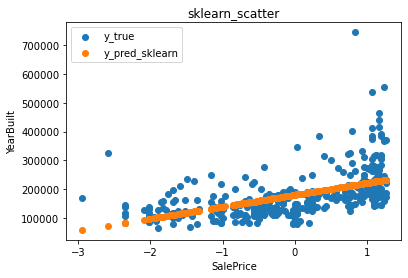

In [40]:
# 可視化:スクラッチ実装

plt.title('sklearn_scatter')
plt.xlabel('SalePrice')
plt.ylabel('YearBuilt')
plt.scatter(X_test_scaler, y_test, label='y_true')
plt.scatter(X_test_scaler, y_pred_sklearn, label='y_pred_sklearn')
plt.legend()
plt.show()

## 【問題7】学習曲線のプロット
学習曲線を表示する関数を作成し、実行してください。
グラフを見て損失が適切に下がっているかどうか確認してください。

線形回帰クラスの雛形ではself.loss, self.val_lossに損失を記録しておくようになっているため、
入力にはこれを利用してください。

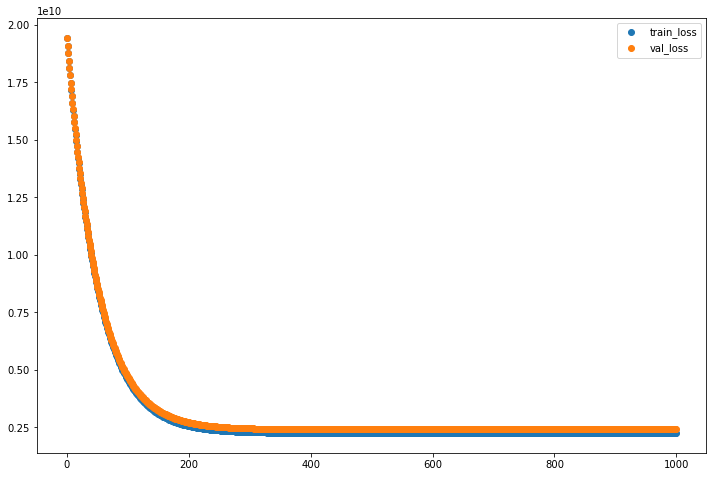

In [42]:
fig, ax = plt.subplots(figsize=(12,8))

plt.scatter(range(len(reg_scratch.loss)), reg_scratch.loss, label='train_loss')
plt.scatter(range(len(reg_scratch.val_loss)), reg_scratch.val_loss, label='val_loss')
plt.legend()